# Série 7 - Exercices - Solution

Dans cette série d'exercice, nous allons analyser une partie d'un jeu de donnée collecté à la Chaux-de Fonds à l'aide de statistiques univariées. 

Ce jeu de donnée contient des analyses de quantités de métaux lourds mesurés dans des échantillons de sol à l'Est de la Chaux-de-Fond. Le jeu de donnée contient aussi des informations sur le type de géologie et le type d'utilisation du territoire au point de prélèvement.

Les données sont fournies dans le fichier `SolChauxDeFond.txt`.

Chaque ligne correspond à un échantillon, chaque ligne contient dans l'ordre les variables suivantes : `X Y Z Cd Co Cr Cu Geology Landuse Ni Pb Zn`. Les trois premières colonnes correspondent aux coordonnées de l'échantillon. On a ensuite, des teneurs en Cadmium, Cobal, Chrome, Cuivre. Puis un code pour la géologie et le type d'utilisation du sol, et enfin les teneurs en Nickel, Plomb et Zinc.

Les concentrations sont données en mg par kg.

**Exercice 1 - Chargement des données et histogrammes**

Charger les données, extraire les colonnes correspondants aux Cobalt et au Chrome. 

Représenter l'histogramme de ces deux jeux de données (en densité de probabilité). Essayer de mettre les deux histogrammes sur la même figure. Mettez les légendes sur les axes et pour les histogrammes. Le paramètre `alpha` peut être utilisé pour rendre les histogrammes partiellement transparents. La valeur de alpha est un degré d'opacité compris entre 0 (complètement transparent) et 1 (complètement opaque). La syntaxe est du type `plt.hist(data,alpha=0.8)`.

Sur la base de votre analyse visuelle de la figure obtenue, indiquer quel métaux lourd présente la plus forte moyenne et la plus forte variance. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('data/SolChauxDeFond.txt',skiprows=1)
co, cr = data[:,4], data[:,5]

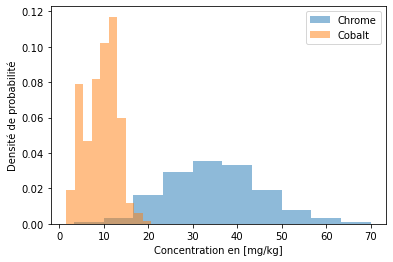

In [3]:
plt.hist(cr, density=True, alpha=0.5, label='Chrome')
plt.hist(co, density=True, alpha=0.5, label='Cobalt')
plt.legend()
plt.xlabel('Concentration en [mg/kg]')
plt.ylabel('Densité de probabilité')
plt.show()

**Remarque:** On observe sur la figure que le Cobalt a une distribution plus étroite (variance plus faible) avec une moyenne également plus faible. On note que les deux distributions sont assez symmétriques.

**Exercice 2 - Histogrammes cumulés** 

Faire un histogramme cumulé avec 100 classes de valeurs comprises entre 0 et 80, pour chaque jeux de données. Indiquez correctement les légendes sur les axes des deux figures.

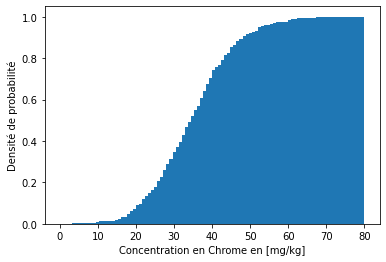

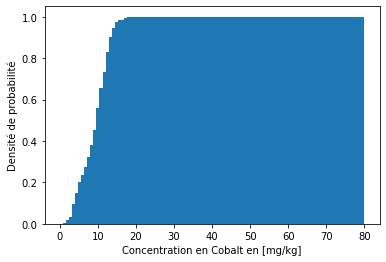

In [4]:
plt.hist(cr, bins=100, range=[0,80], density=True, cumulative=True)
plt.xlabel('Concentration en Chrome en [mg/kg]')
plt.ylabel('Densité de probabilité')
plt.show()

plt.hist(co, bins=100, range=[0,80], density=True, cumulative=True)
plt.xlabel('Concentration en Cobalt en [mg/kg]')
plt.ylabel('Densité de probabilité')
plt.show()

**Exercice 3 - Statistiques descriptives**

Ecrivez une fonction qui prend en entrée un tableau de valeurs (numpy array, calcule les statistiques descriptives de base, et les imprime.

Appliquer cette fonction pour calculer les statistiques de vos deux jeux de données.

Est-ce que vous observations précédentes sont confirmées? Avez-vous bien des valeurs qui correspondent à votre interprétation des graphes ?

In [5]:
def stat_descriptives(x):
    n = len(x)
    x_max = np.max(x)
    x_min = np.min(x)
    x_moy = np.mean(x)
    x_var = np.var(x, ddof=1)
    x_std = np.std(x, ddof=1)
    x_p25, x_med, x_p75 = np.percentile(x, [25,50,75])
    print('Nb mesures:', n)
    print(f'Maximum:{x_max:6.2f}')
    print(f'P75:{x_p75:6.2f}')
    print(f'Moyenne:{x_moy:6.2f}')
    print(f'Mediane:{x_med:6.2f}')
    print(f'P25:{x_p25:6.2f}')
    print(f'Minimum:{x_min:6.2f}')
    print(f'Variance:{x_var:6.2f}')
    print(f'Ecart-type:{x_std:6.2f}')

In [6]:
stat_descriptives(co)

Nb mesures: 359
Maximum: 20.60
P75: 12.10
Moyenne:  9.44
Mediane:  9.84
P25:  6.66
Minimum:  1.55
Variance: 12.73
Ecart-type:  3.57


In [7]:
stat_descriptives(cr)

Nb mesures: 359
Maximum: 70.00
P75: 41.46
Moyenne: 35.02
Mediane: 34.80
P25: 27.64
Minimum:  3.32
Variance:113.69
Ecart-type: 10.66


**Observations:** Comme vu sur les figures, on a bien la moyenne de la concentration en Cobalt qui est plus faible que celle pour le chrome, de même les écarts-type et variance du Cobalt sont plus faibles que pour le Chrome.

**Exercice 4 - Boîtes à moustache**

Faire une figure avec les boites à moustaches permettant de comparer visuellement les statistiques de la concentration en Cobalt et en Chrome.


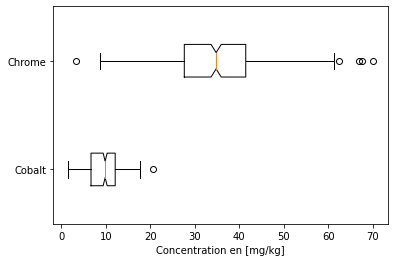

In [8]:
plt.boxplot([co, cr], labels=['Cobalt', 'Chrome'], 
            widths=0.3, notch=True, vert=False)
plt.xlabel('Concentration en [mg/kg]')
plt.show()